In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


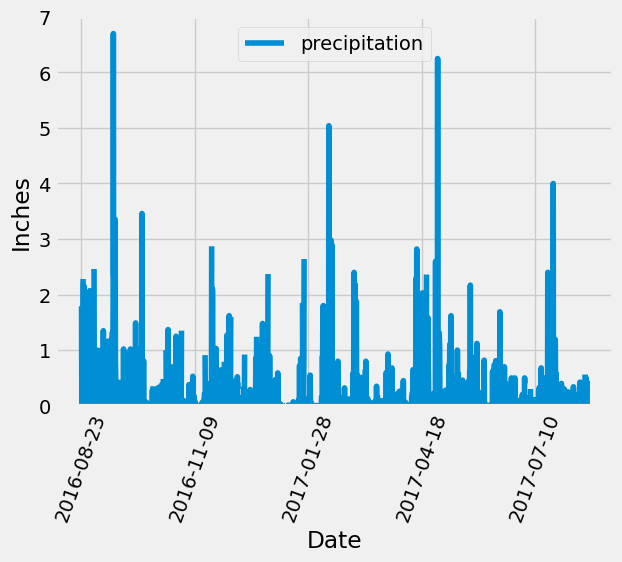

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement).order_by(Measurement.date.desc())

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_total = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
values_df = pd.DataFrame(precip_total, columns=["date", "precipitation"])
values_df.set_index("date", inplace=True)

# Sort the dataframe by date
values_sorted_df=values_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
values_sorted_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = values_sorted_df.describe()
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station).distinct().count()
total_stations

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#act_s = active station/mas = Most Active Station
act_s = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
active_stations = act_s.all()
mas = act_s.first()[0]
print(f"The most active station is {mas}")
active_stations

The most active station is USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs), ).\
    filter(Measurement.station == "USC00519281").all()
results

[(54.0, 85.0, 71.66378066378067)]

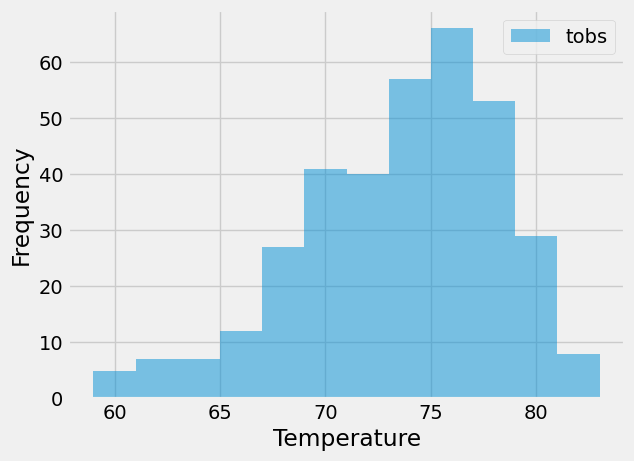

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stat_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).\
    filter(Measurement.station == "USC00519281").order_by(Measurement.date)

# Converting to DataFrame
stat_temp_df = pd.DataFrame(stat_temp, columns= ["date", "tobs"])

stat_temp_df.plot.hist(bins=12, alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [27]:
# Close Session
session.close()